<a href="https://colab.research.google.com/github/imanrahman52/Tugas_Pemrograman_Python/blob/main/Tugas2_Pemrograman_Python_M_Iman_Rahmanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [94]:
ls

Dataset_Daun/  nnData/  Untitled0.ipynb


In [12]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os 

In [5]:
print("[INFO] Loading Gambar...")
imagePaths = paths.list_images("Dataset_Daun")
data = []
labels = []

[INFO] Loading Gambar...


In [6]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]  
  labels.append(label)

In [7]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09',

In [8]:
lb = LabelBinarizer()
labels  = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [10]:
(trainX, testX, trainY,  testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(447, 128, 128, 3)
(149, 128, 128, 3)


In [71]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16,2,2, activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32,2,2, activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               204900    
_________________________________________________________________
dense_25 (Dense)             (None, 5)               

In [78]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 71ms/step - loss: 0.0913 - accuracy: 0.9732 - val_loss: 0.9430 - val_accuracy: 0.7785
Epoch 2/25
14/14 [==============================] - 1s 61ms/step - loss: 0.0762 - accuracy: 0.9821 - val_loss: 0.6416 - val_accuracy: 0.8188
Epoch 3/25
14/14 [==============================] - 1s 63ms/step - loss: 0.0440 - accuracy: 0.9978 - val_loss: 0.6617 - val_accuracy: 0.7919
Epoch 4/25
14/14 [==============================] - 1s 61ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.7852
Epoch 5/25
14/14 [==============================] - 1s 63ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.6458 - val_accuracy: 0.8054
Epoch 6/25
14/14 [==============================] - 1s 62ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.6717 - val_accuracy: 0.8188
Epoch 7/25
14/14 [==============================] - 1s 62ms/step - loss: 0.0247 - accuracy: 0.9978 - val_loss: 0.7416 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


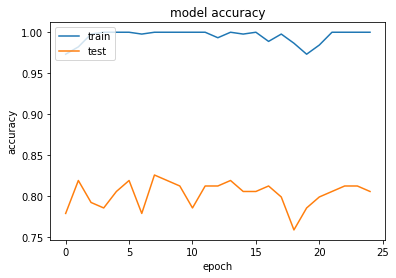

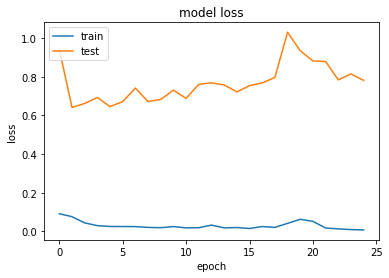

In [81]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_07       0.78      0.71      0.75        35
      GMB_08       0.83      0.94      0.88        31
      GMB_09       0.88      0.96      0.92        23
      GMB_10       0.79      0.77      0.78        30
      GMB_11       0.75      0.70      0.72        30

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.80      0.81      0.80       149



In [84]:
model1.save('nnData')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnData/assets
